# Netflix Data EDA :

Nowadays, it's became a habit to binge watching contents on weekends in various streaming platforms such as Netflix, Prime Video, etc.,
This Exploratory Data Analysis is on Netflix Shows and Movies' data. The dataset which I am using in this notebook was downloaded from Kaggle [here](https://www.kaggle.com/shivamb/netflix-shows).

Description of few variables :
- **type**         - type of the content(Tv show/Movie)
- **date_added**   - date on which the content was released on Netflix
- **release_year** - year on which the content was released
- **rating**       - certificate of the content
- **listed_in**    - Content's genere

### **Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Downloading the Dataset**

In [3]:
# downloading dataset

from urllib.request import urlretrieve

urlretrieve("https://raw.githubusercontent.com/madhankumarnagaraji/Datasets/main/netflix_titles.csv", "data.csv")

('data.csv', <http.client.HTTPMessage at 0x7f882b0e1510>)

In [4]:
# reading data using pandas
df = pd.read_csv('data.csv')

### **Understanding Data**

In [5]:
df.head() #gives the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail() # gives the last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


***Key Takeaway :*** 

For the year 2021, the data is available only for the month of January.

In [7]:
df.shape # gives no. of rows and columns

(7787, 12)

In [8]:
df.info() # gives info about NA values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **Data Preparation and Cleaning**

### **Descriptive Statistics**

In [9]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Since only one column is numerical, seeing ***descriptive statistics is useless*** in this dataset.

### **Dropping Unnecessary Columns**

In [10]:
df.drop(['show_id','cast','description'], axis= 1, inplace= True)
df.sample(5)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
5926,TV Show,Survivor,NaN,United States,"November 15, 2020",2014,TV-14,2 Seasons,Reality TV
842,Movie,"Berlin, I Love You",NaN,Germany,"June 8, 2019",2019,R,120 min,"Dramas, International Movies, Romantic Movies"
843,Movie,Berserk: The Golden Age Arc I - The Egg of the...,Toshiyuki Kubooka,Japan,"October 15, 2016",2012,TV-MA,77 min,"Action & Adventure, Anime Features, Internatio..."
2832,TV Show,House of Cards,NaN,United States,"November 2, 2018",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers"
6868,Movie,The Sign of Venus,Dino Risi,Italy,"November 13, 2020",1955,TV-14,97 min,"Classic Movies, Comedies, Independent Movies"


**Dropping "show_id, cast, description"**column because it not going to help us in the further analysis.

### **Missing Values**

In [11]:
df.isna().sum()   # gives the sum of missing values in each column

type               0
title              0
director        2389
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
dtype: int64

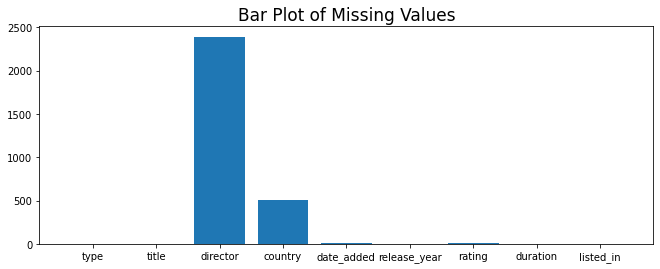

In [12]:
plt.figure(figsize= [11,4])   # setting the figure size

plt.bar(x=df.columns, height = df.isna().sum())   # barplot of missing values' columns

plt.title("Bar Plot of Missing Values", {'fontsize' : 17});    # giving the appropriate title

As you can see from the above figure, more values are ***missing*** in the **director's** columns, proceeding cast, country and date_added.

In [13]:
# converting the datatypes of feature variables
df = df.convert_dtypes()

In [14]:
df['date_added'] = pd.to_datetime(df['date_added']) # converting the datatype to datetime
df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

In [15]:
df['type'] = df['type'].astype('category')  # converting the type to category
df['country'] = df.country.astype('category') # converting the type to category

In [16]:
df.dtypes # gives the datatypes of all variables

type                  category
title                   string
director                string
country               category
date_added      datetime64[ns]
release_year             Int64
rating                  string
duration                string
listed_in               string
dtype: object

In [17]:
df["year"] = df.date_added.dt.year  # adding "year" as a new column

In [18]:
df["month"] = df.date_added.dt.month  # adding "month" as a new column

In [19]:
# splitting the dataframe with respect to TV shows and Movies
df_tv_show = df[df.type == 'TV Show'] 
df_tv_show.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month
0,TV Show,3%,<NA>,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,8.0
5,TV Show,46,Serdar Akar,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",2017.0,7.0
11,TV Show,1983,<NA>,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",2018.0,11.0
12,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",2019.0,5.0
16,TV Show,Feb-09,<NA>,NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas",2019.0,3.0


In [20]:
df_movie = df[df.type == 'Movie']
df_movie.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month
1,Movie,7:19,Jorge Michel Grau,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",2016.0,12.0
2,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",2018.0,12.0
3,Movie,9,Shane Acker,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,11.0
4,Movie,21,Robert Luketic,United States,2020-01-01,2008,PG-13,123 min,Dramas,2020.0,1.0
6,Movie,122,Yasir Al Yasiri,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies",2020.0,6.0


In [21]:
# Finding the duplicate rows in the dataframe
df.duplicated().sum()

0

There is ***no duplicated rows*** in the dataframe.

## **Exploratory Analysis and Visualization**

## Q1 : When Netflix started to Emerge?

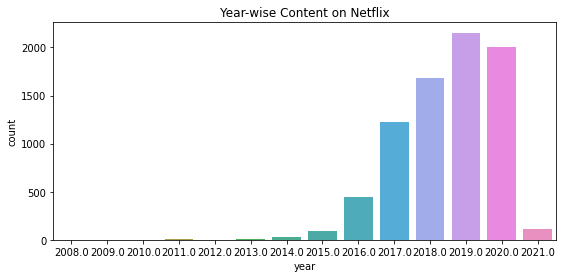

In [22]:
plt.figure(figsize= [9, 4])   # setting the figure size

sns.countplot(df.year)    # count plot of contents

plt.title("Year-wise Content on Netflix");    # setting the appropriate title

From the graph above, ***Netflix began to emerge in 2016, and then it continues to grow after that.***

## Q2 : Which is more produced? Tv shows or Movies?

In [23]:
df.type.value_counts()    # shows the count of each type

Movie      5377
TV Show    2410
Name: type, dtype: int64

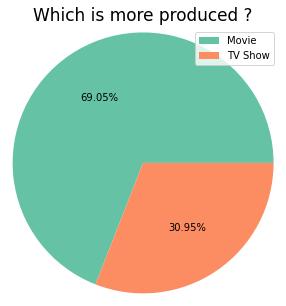

In [24]:
plt.figure(figsize= [10, 5])    # setting the figure size

plt.pie(df.type.value_counts(), autopct= '%1.2f%%', labels= df.type.value_counts().index, radius= 1.2, labeldistance= None, colors= sns.color_palette("Set2"));    # pie-chart of results

plt.legend(loc= "upper right")    # giving the legend

plt.title("Which is more produced ?", {'fontsize' : 17});   # setting the appropriate title

As seen from the Pie-Chart, ***Movies are mostly produced.***

## Q3 : When Netflix started producing Tv Shows?

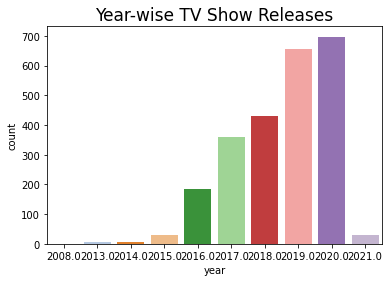

In [25]:
# creating a countplot of years in which tv shows are released
sns.countplot(df_tv_show.year, palette='tab20');

plt.title("Year-wise TV Show Releases", {'fontsize' : 17});

**So, Netflix started testing on TV Shows in the year 2013, as it showing good results then they gradually started producing more TV Shows in the following years.**

## Q4 : In which year, more films(and shows) got released?

In [26]:
df.release_year.value_counts()   # gives the no. of movies(and shows) released in each year

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1947       1
1959       1
1964       1
1966       1
1925       1
Name: release_year, Length: 73, dtype: Int64

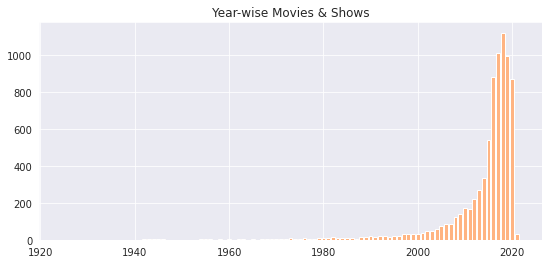

In [27]:
sns.set_style('darkgrid')   # set the background as dark grid

colors = sns.color_palette('pastel')    # gives a light color for the bars

plt.figure(figsize=[9,4])   # giving the required figure size 

plt.bar(df.release_year.sort_values().unique(), df.release_year.value_counts().sort_index(), color= colors[1])    # barplot of results

plt.title("Year-wise Movies & Shows");    # giving the appropriate title

The year **2018** had the ***highest number of movies and shows released.***

## Q5 : Which Genere Contents are mostly released ?

In [28]:
df.listed_in.unique()   # seeing the unique values in genere

<StringArray>
[                         'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
                                                    'Dramas, International Movies',
                                             'Horror Movies, International Movies',
                        'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
                                                                          'Dramas',
                                 'International TV Shows, TV Dramas, TV Mysteries',
                                  'Horror Movies, International Movies, Thrillers',
                                                               'Dramas, Thrillers',
                               'Crime TV Shows, International TV Shows, TV Dramas',
                              'Crime TV Shows, Docuseries, International TV Shows',
 ...
                                    'Classic & Cult TV, Crime TV Shows, TV Dramas',
                                                        '

In [29]:
l = df.listed_in.to_string(index= False)    # converting the Series to a string

list_string = l.splitlines()    # spliting it with new line characters
list_string[0:6]

[' International TV Shows, TV Dramas, TV Sci-Fi &...',
 '                      Dramas, International Movies',
 '               Horror Movies, International Movies',
 ' Action & Adventure, Independent Movies, Sci-Fi...',
 '                                            Dramas',
 '   International TV Shows, TV Dramas, TV Mysteries']

In [30]:
# separating each genere in a movie by comma separator
genere_list = []
for x in list_string :
  genere_list.extend(x.split(sep=', '))

genere_list[0:6]

[' International TV Shows',
 'TV Dramas',
 'TV Sci-Fi &...',
 '                      Dramas',
 'International Movies',
 '               Horror Movies']

In [31]:
# removing the trailing spaces in each genere
generes = []

for genere in genere_list :
  generes.append(str.lstrip(genere))

# converting the list into pandas Series
Genere = pd.Series(generes) 
Genere

0        International TV Shows
1                     TV Dramas
2                TV Sci-Fi &...
3                        Dramas
4          International Movies
                  ...          
16990              Music & M...
16991    International TV Shows
16992                Reality TV
16993             Documentaries
16994          Music & Musicals
Length: 16995, dtype: object

In [32]:
# Now, splitting it with respect to Movies and Tv shows
Genere_TV = Genere[Genere.str.contains("TV", case= False)]
print("TV Shows Generes : \n", Genere_TV.head(), "\n")

Genere_Movie = Genere[~Genere.isin(Genere_TV)]
print("Movies Generes : \n", Genere_Movie.head())

TV Shows Generes : 
 0     International TV Shows
1                  TV Dramas
2             TV Sci-Fi &...
11    International TV Shows
12                 TV Dramas
dtype: object 

Movies Generes : 
 3                  Dramas
4    International Movies
5           Horror Movies
6    International Movies
7      Action & Adventure
dtype: object


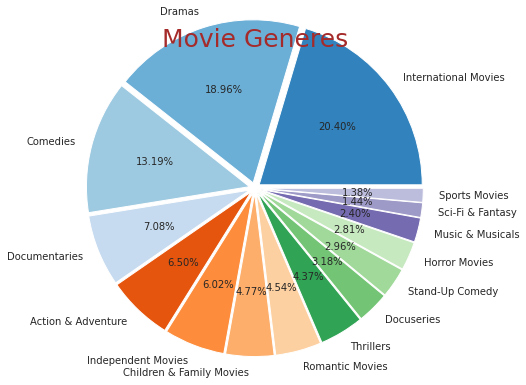

In [33]:
# visualizing the Movie Generes with a Pie-chart
plt.figure(figsize= [6.5, 5])

plt.pie(Genere_Movie.value_counts().head(15),  
        labels= Genere_Movie.value_counts().index[0:15],
        radius= 1.5, 
        colors= sns.set_palette('tab20c', n_colors= 15),
        labeldistance= 1.1, 
        explode= [0.05 for x in range(15)], 
        autopct= '%1.2f%%');

plt.title("Movie Generes", {'fontsize' : 25, 'color' : 'brown', 'fontweight' : 20});

**Mostly produced movie generes** are 
- International Movies
- Dramas
- Comedies
- Documentaries
- Action & Adventure

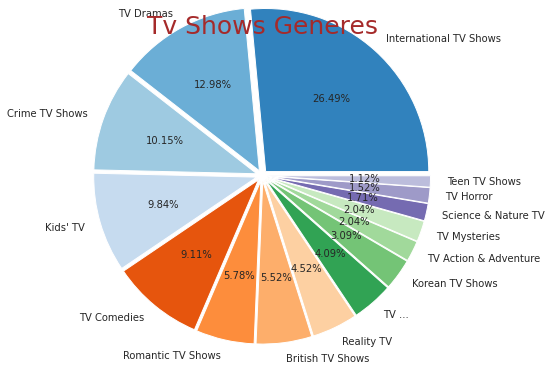

In [34]:
# visualizing the TV Shows Generes with a Pie-chart
plt.figure(figsize= [6.5, 5])

plt.pie(Genere_TV.value_counts().head(15),  
        labels= Genere_TV.value_counts().index[0:15],
        radius= 1.5, 
        colors= sns.set_palette('tab20c', n_colors= 15),
        labeldistance= 1.1, 
        explode= [0.05 for x in range(15)], 
        autopct= '%1.2f%%');
        
plt.title("Tv Shows Generes", {'fontsize' : 25, 'color' : 'brown', 'fontweight' : 20});

**Mostly produced Tv Show generes** are 
- International TV Shows
- TV Dramas
- Crime Shows
- Kids' Shows
- TV Comedies

## Q6 : What's the Common Duration of the Contents ?

In [35]:
# duration of tv shows
duration_TV = df_tv_show[df_tv_show.duration.str.contains('season*', case= False )]['duration']

In [36]:
# duration of movies
duration_Movie = df_movie[df_movie.duration.str.contains('min', case= False)]['duration']

duration_Movie = duration_Movie.str.replace(' min', '')
duration_Movie = duration_Movie.astype('int')

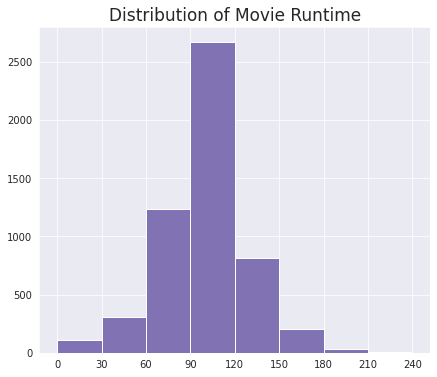

In [37]:
# histogram of movies' runtime
plt.figure(figsize= [7,6])

plt.xticks(np.arange(0,241,30));

plt.hist(duration_Movie, bins= np.arange(0,241,30), color= sns.color_palette('deep')[4])

plt.title("Distribution of Movie Runtime", {'fontsize' : 17});

**So, from the above histogram, most films(2666 films) in Netflix have 90-120 minutes runtime.**

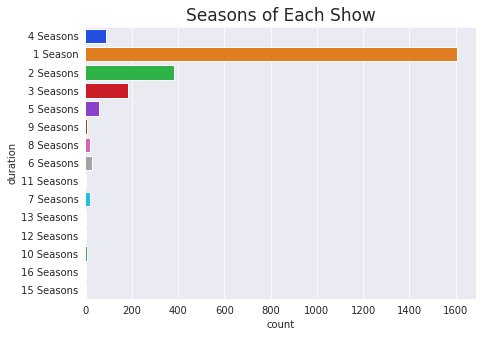

In [38]:
# countplot of tv shows' seasons
plt.figure(figsize=[7,5])

sns.countplot(y=duration_TV, palette= 'bright')

plt.title("Seasons of Each Show", {'fontsize' : 17});

It's clearly seen from the plot that ***most TV Shows in Netflix is of 1 Season.***

## Q7 : Which country movies and shows does Netflix have most ?

In [39]:
# top 10 countries contents count
df.country.value_counts().head(10)

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: country, dtype: int64

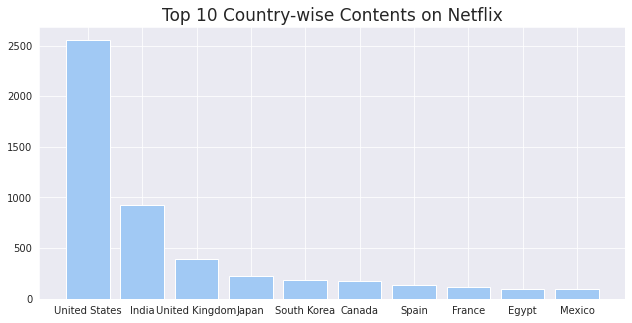

In [40]:
# visualizing the results
plt.figure(figsize=[10.5,5])

plt.bar(x= df.country.value_counts().index[0:10], height=df.country.value_counts().head(10), color= colors[0])

plt.title("Top 10 Country-wise Contents on Netflix", {'fontsize' : 17});

It's obvious from the plot that ***Netflix has more United States Contents*** followed by India, UK, Japan, etc., 

## **Inferences and Conclusion**

1. Netflix started to emerge in 2016.
2. Movies are more produced than TV Shows.
3. Netflix started producing TV Shows on 2013.
4. More Contents are released in the year 2018 than any other year.
5. International Contents and Dramas are mostly produced in both Movies and TV Shows.
6. Maximum films have a runtime of 90-120 minutes and many TV Shows are  of 1 season length.
7. United States Contents are more in Netflix comparing to other countries.

In [41]:
import jovian

In [ ]:
jovian.commit()